<a href="https://colab.research.google.com/github/mmaruthi/Deep_Learning_EVA4_Phase1/blob/master/S8_ResNet_Modular/Master_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mounting the drive and copying the code from github to drive
from google.colab import drive 
drive.mount('/content/gdrive')
%cd gdrive/My Drive/project_folder
! ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/project_folder


In [2]:
!git clone https://github.com/mmaruthi/Deep_Learning_EVA4_Phase1

Cloning into 'Deep_Learning_EVA4_Phase1'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 726 (delta 31), reused 0 (delta 0), pack-reused 674
Receiving objects: 100% (726/726), 4.25 MiB | 6.84 MiB/s, done.
Resolving deltas: 100% (452/452), done.


In [3]:
%cd Deep_Learning_EVA4_Phase1/S8_ResNet_Modular
! ls

/content/gdrive/My Drive/project_folder/Deep_Learning_EVA4_Phase1/S8_ResNet_Modular
Master_Model.ipynb  model  README.md  s8_resnet.py


In [0]:
from __future__ import print_function
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from tqdm import tqdm
from model import Datatransforms,Model,Dataloaders,Train_Losses,Test_losses

In [8]:
data_loader = Dataloaders.DataLoader(shuffle=True,batch_size=128,seed=1)

mean = (0.49139968, 0.48215841, 0.44653091)
stdev = (0.24703223, 0.24348513, 0.26158784)
transform_instance  = Datatransforms.Transforms_custom(normalize=True, mean=mean, stdev=stdev)

before_norm_list = [transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
               transforms.RandomRotation((-7,7),fill=(1,))]
               
test_transforms   = transform_instance.test_transforms()
train_transforms  = transform_instance.train_transforms(before_norm = None)

train_data = torchvision.datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test_data  = torchvision.datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
trainloader = data_loader.load(train_data)
testloader  = data_loader.load(test_data)

In [10]:
import s8_resnet
import torch
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = s8_resnet.ResNet18()
model.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
train_loss = Train_Losses.Train_loss()
test_loss  = Test_losses.Test_loss()

# Train and Test the model 

In [14]:
EPOCH     = 40
L2_factor = 0.0005
L1_factor = 0.001
OPTIMIZER = optim.SGD(model.parameters(), lr=0.025, momentum=0.9,weight_decay=L2_factor)
train_loss_all = []
train_acc_all  = []
test_loss_all  = []
test_acc_all   = []

for epoch in range(EPOCH):

    print("EPOCH:", epoch)
    train_losses, train_acc = train_loss.train_loss_calc(model,device,train_loader=trainloader,optimizer=OPTIMIZER,epoch=EPOCH,factor=L1_factor)
    test_losses, test_acc   = test_loss.test_loss_calc(model,device,test_loader=testloader)

    train_loss_all.extend(train_losses)
    train_acc_all.extend(train_acc)
    test_loss_all.extend(test_losses)
    test_acc_all.extend(test_acc)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Train Loss = 0.36354774236679077 Batch Id = 390 Train Accuracy = 80.13: 100%|██████████| 391/391 [00:56<00:00,  6.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7866, Test Accuracy: 74.44

EPOCH: 1


Train Loss = 0.6101049780845642 Batch Id = 390 Train Accuracy = 84.82: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8672, Test Accuracy: 72.46

EPOCH: 2


Train Loss = 0.3959835171699524 Batch Id = 390 Train Accuracy = 88.15: 100%|██████████| 391/391 [00:59<00:00,  6.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8654, Test Accuracy: 74.68

EPOCH: 3


Train Loss = 0.42021292448043823 Batch Id = 390 Train Accuracy = 90.84: 100%|██████████| 391/391 [00:58<00:00,  7.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7392, Test Accuracy: 77.88

EPOCH: 4


Train Loss = 0.4139176607131958 Batch Id = 390 Train Accuracy = 92.92: 100%|██████████| 391/391 [00:58<00:00,  7.51it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7164, Test Accuracy: 79.05

EPOCH: 5


Train Loss = 0.24691849946975708 Batch Id = 390 Train Accuracy = 94.57: 100%|██████████| 391/391 [00:58<00:00,  7.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6440, Test Accuracy: 80.85

EPOCH: 6


Train Loss = 0.07013475149869919 Batch Id = 390 Train Accuracy = 96.13: 100%|██████████| 391/391 [00:58<00:00,  7.61it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7247, Test Accuracy: 80.58

EPOCH: 7


Train Loss = 0.11075365543365479 Batch Id = 390 Train Accuracy = 96.88: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7309, Test Accuracy: 80.75

EPOCH: 8


Train Loss = 0.09246993809938431 Batch Id = 390 Train Accuracy = 97.19: 100%|██████████| 391/391 [00:58<00:00,  7.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8014, Test Accuracy: 80.35

EPOCH: 9


Train Loss = 0.09370480477809906 Batch Id = 390 Train Accuracy = 97.31: 100%|██████████| 391/391 [00:58<00:00,  7.56it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6988, Test Accuracy: 81.89

EPOCH: 10


Train Loss = 0.07510897517204285 Batch Id = 390 Train Accuracy = 97.95: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7930, Test Accuracy: 80.94

EPOCH: 11


Train Loss = 0.1259288787841797 Batch Id = 390 Train Accuracy = 98.33: 100%|██████████| 391/391 [00:58<00:00,  7.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7623, Test Accuracy: 80.97

EPOCH: 12


Train Loss = 0.1586804986000061 Batch Id = 390 Train Accuracy = 98.18: 100%|██████████| 391/391 [00:58<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6425, Test Accuracy: 83.20

EPOCH: 13


Train Loss = 0.025869805365800858 Batch Id = 390 Train Accuracy = 98.77: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7180, Test Accuracy: 82.07

EPOCH: 14


Train Loss = 0.05685097351670265 Batch Id = 390 Train Accuracy = 98.58: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8640, Test Accuracy: 79.21

EPOCH: 15


Train Loss = 0.0539688915014267 Batch Id = 390 Train Accuracy = 98.30: 100%|██████████| 391/391 [00:58<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7438, Test Accuracy: 81.64

EPOCH: 16


Train Loss = 0.06449881941080093 Batch Id = 390 Train Accuracy = 98.33: 100%|██████████| 391/391 [00:58<00:00,  7.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6747, Test Accuracy: 82.45

EPOCH: 17


Train Loss = 0.03445828706026077 Batch Id = 390 Train Accuracy = 99.08: 100%|██████████| 391/391 [00:58<00:00,  6.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7125, Test Accuracy: 82.34

EPOCH: 18


Train Loss = 0.02528136968612671 Batch Id = 390 Train Accuracy = 98.82: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7495, Test Accuracy: 82.14

EPOCH: 19


Train Loss = 0.11864686757326126 Batch Id = 390 Train Accuracy = 98.96: 100%|██████████| 391/391 [00:58<00:00,  7.44it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7841, Test Accuracy: 80.25

EPOCH: 20


Train Loss = 0.09874837100505829 Batch Id = 390 Train Accuracy = 98.27: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7230, Test Accuracy: 81.65

EPOCH: 21


Train Loss = 0.09540923684835434 Batch Id = 390 Train Accuracy = 98.30: 100%|██████████| 391/391 [00:58<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6797, Test Accuracy: 82.07

EPOCH: 22


Train Loss = 0.042539119720458984 Batch Id = 390 Train Accuracy = 98.74: 100%|██████████| 391/391 [00:58<00:00,  7.54it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7735, Test Accuracy: 80.93

EPOCH: 23


Train Loss = 0.07828148454427719 Batch Id = 390 Train Accuracy = 98.89: 100%|██████████| 391/391 [00:58<00:00,  7.50it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6538, Test Accuracy: 83.09

EPOCH: 24


Train Loss = 0.05468098074197769 Batch Id = 390 Train Accuracy = 99.03: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7030, Test Accuracy: 81.92

EPOCH: 25


Train Loss = 0.0491669662296772 Batch Id = 390 Train Accuracy = 98.35: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7653, Test Accuracy: 80.92

EPOCH: 26


Train Loss = 0.05769973620772362 Batch Id = 390 Train Accuracy = 98.18: 100%|██████████| 391/391 [00:58<00:00,  6.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6891, Test Accuracy: 81.66

EPOCH: 27


Train Loss = 0.036316175013780594 Batch Id = 390 Train Accuracy = 98.61: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7114, Test Accuracy: 82.40

EPOCH: 28


Train Loss = 0.03598091006278992 Batch Id = 390 Train Accuracy = 99.12: 100%|██████████| 391/391 [00:58<00:00,  7.55it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6608, Test Accuracy: 82.92

EPOCH: 29


Train Loss = 0.09550794214010239 Batch Id = 390 Train Accuracy = 99.29: 100%|██████████| 391/391 [00:59<00:00,  6.62it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6366, Test Accuracy: 83.21

EPOCH: 30


Train Loss = 0.04338912293314934 Batch Id = 390 Train Accuracy = 98.91: 100%|██████████| 391/391 [00:58<00:00,  7.42it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7498, Test Accuracy: 81.19

EPOCH: 31


Train Loss = 0.11767776310443878 Batch Id = 390 Train Accuracy = 98.29: 100%|██████████| 391/391 [00:58<00:00,  7.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7446, Test Accuracy: 81.01

EPOCH: 32


Train Loss = 0.0838303416967392 Batch Id = 390 Train Accuracy = 98.18: 100%|██████████| 391/391 [00:58<00:00,  6.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6956, Test Accuracy: 82.28

EPOCH: 33


Train Loss = 0.06304657459259033 Batch Id = 390 Train Accuracy = 98.29: 100%|██████████| 391/391 [00:58<00:00,  6.68it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6800, Test Accuracy: 81.82

EPOCH: 34


Train Loss = 0.08482758700847626 Batch Id = 390 Train Accuracy = 98.55: 100%|██████████| 391/391 [00:58<00:00,  7.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6828, Test Accuracy: 82.23

EPOCH: 35


Train Loss = 0.021834438666701317 Batch Id = 390 Train Accuracy = 99.03: 100%|██████████| 391/391 [00:58<00:00,  6.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6600, Test Accuracy: 83.07

EPOCH: 36


Train Loss = 0.10244964063167572 Batch Id = 390 Train Accuracy = 98.86: 100%|██████████| 391/391 [00:58<00:00,  7.47it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7294, Test Accuracy: 81.23

EPOCH: 37


Train Loss = 0.10013693571090698 Batch Id = 390 Train Accuracy = 98.68: 100%|██████████| 391/391 [00:58<00:00,  6.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7285, Test Accuracy: 81.92

EPOCH: 38


Train Loss = 0.07515749335289001 Batch Id = 390 Train Accuracy = 98.07: 100%|██████████| 391/391 [00:58<00:00,  6.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7226, Test Accuracy: 80.94

EPOCH: 39


Train Loss = 0.04189910739660263 Batch Id = 390 Train Accuracy = 98.25: 100%|██████████| 391/391 [00:58<00:00,  7.35it/s]



Test set: Average loss: 0.6986, Test Accuracy: 82.10



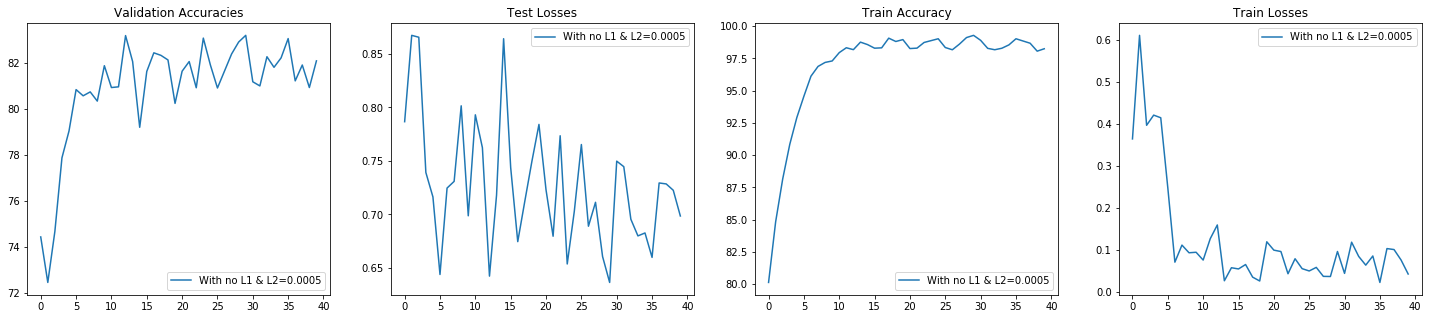

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
    
figure = plt.figure(figsize=(25,5))
labels = ['With no L1 & L2=0.0005']

plt.subplot(1,4,1)
plt.title("Validation Accuracies")
plt.plot(test_acc_all,label=labels[0])
plt.legend(loc="best")

plt.subplot(1,4,2)
plt.title("Test Losses")
plt.plot(test_loss_all,label=labels[0])
plt.legend(loc="best")

plt.subplot(1,4,3)
plt.title("Train Accuracy")
plt.plot(train_acc_all,label=labels[0])
plt.legend(loc="best")   

plt.subplot(1,4,4)
plt.title("Train Losses")
plt.plot(train_loss_all,label=labels[0])
plt.legend(loc="best")    

In [72]:
train_acc_all

[45.716,
 61.952,
 67.998,
 71.648,
 73.67,
 75.522,
 76.976,
 77.876,
 78.798,
 79.352,
 80.16,
 80.806,
 81.414,
 81.72,
 81.872,
 82.202,
 82.604,
 82.66799999999999,
 83.176,
 83.234,
 83.482,
 83.718,
 83.864,
 84.256,
 84.314]